In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import re
from textblob import TextBlob
from tensorflow import keras 
from tensorflow.keras import layers

In [150]:
!pip install textblob

Defaulting to user installation because normal site-packages is not writeable


In [151]:
data=pd.read_csv(r"C:\Users\CHHAYA SINGH\Desktop\PythonAssignments\amazonreviews.tsv",sep='\t')

In [152]:
data

,label,review
0,pos,Stuning even for the non-gamer: This sound tra...
1,pos,The best soundtrack ever to anything.: I'm rea...
2,pos,Amazing!: This soundtrack is my favorite music...
3,pos,Excellent Soundtrack: I truly like this soundt...
4,pos,"Remember, Pull Your Jaw Off The Floor After He..."
...,...,...
9995,pos,A revelation of life in small town America in ...
9996,pos,Great biography of a very interesting journali...
9997,neg,Interesting Subject; Poor Presentation: You'd ...
9998,neg,Don't buy: The box looked used and it is obvio...


In [153]:
data.head()

,label,review
0,pos,Stuning even for the non-gamer: This sound tra...
1,pos,The best soundtrack ever to anything.: I'm rea...
2,pos,Amazing!: This soundtrack is my favorite music...
3,pos,Excellent Soundtrack: I truly like this soundt...
4,pos,"Remember, Pull Your Jaw Off The Floor After He..."


In [154]:
data.shape

(10000, 2)

In [155]:
data['review'][1]

"The best soundtrack ever to anything.: I'm reading a lot of reviews saying that this is the best 'game soundtrack' and I figured that I'd write a review to disagree a bit. This in my opinino is Yasunori Mitsuda's ultimate masterpiece. The music is timeless and I'm been listening to it for years now and its beauty simply refuses to fade.The price tag on this is pretty staggering I must say, but if you are going to buy any cd for this much money, this is the only one that I feel would be worth every penny."

In [156]:
data['label'].value_counts()

neg    5097
pos    4903
Name: label, dtype: int64

In [157]:
data.dtypes

label     object
review    object
dtype: object

In [158]:
data.isnull().sum()

label     0
review    0
dtype: int64

# EDA

In [159]:
!pip install contractions

Defaulting to user installation because normal site-packages is not writeable


In [160]:
import contractions


In [161]:
def con(text):
    expand=contractions.fix(text)
    return expand

In [162]:
def clean_text(data):
    #convert into lower case
    data['review'] = data['review'].apply(lambda x:x.lower())
    #remove numbers
    data['review'] = data['review'].apply(lambda elem:re.sub(r'\d+', "",elem))
    #expand contractions
    data['review'] = data['review'].apply(con)
    #remove special characters
    data['review'] = data['review'].apply(lambda elem:re.sub(r'\W+', '  ',elem))
    return data


In [163]:
data_clean = clean_text(data)
data_clean.head()

,label,review
0,pos,stuning even for the non gamer this sou...
1,pos,the best soundtrack ever to anything i ...
2,pos,amazing this soundtrack is my favorite m...
3,pos,excellent soundtrack i truly like this s...
4,pos,remember pull your jaw off the floor af...


In [164]:
from nltk.corpus import stopwords


In [165]:
nltk.download('stopwords')
stop=set(stopwords.words('english'))
print(stop)

{"weren't", 'above', 'no', 'our', 'whom', 'if', "shan't", 'until', 'some', 'because', 'when', 'shan', 'more', 'them', 'up', 'but', 'i', 'under', 'wouldn', "mightn't", 'ours', 'can', 'does', 'been', 'themselves', "didn't", "won't", "shouldn't", 't', "don't", 'was', 'are', 's', 'me', 've', 'they', 'she', 'll', 'against', 'had', 'doesn', 'doing', 'this', 'same', 'your', 'very', 'do', 'did', 'once', 'should', 'not', 'has', 'itself', 'further', 'after', 'or', 'ourselves', 'be', 'being', 'an', 'during', 'o', 'weren', 'a', "wouldn't", 'himself', 'between', 'so', 'haven', "needn't", 'any', 'each', 'from', 'is', "mustn't", 'to', 'aren', 'it', 'those', 'now', 'mightn', 'below', 'in', "wasn't", 'having', 'why', 'nor', 'too', 'm', 'we', 'both', 'yourselves', 'he', "should've", "you'll", 'you', 'will', 'her', 'all', 'for', 're', 'the', 'most', 'down', 'about', 'hers', 'didn', "you're", 'off', 'don', 'how', 'other', 'which', "you've", 'here', 'mustn', 'needn', 'through', 'these', 'wasn', 'ain', "had

[nltk_data] Downloading package stopwords to C:\Users\CHHAYA
[nltk_data]     SINGH\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [166]:
data['review'].head()

0    stuning  even  for  the  non  gamer  this  sou...
1    the  best  soundtrack  ever  to  anything  i  ...
2    amazing  this  soundtrack  is  my  favorite  m...
3    excellent  soundtrack  i  truly  like  this  s...
4    remember  pull  your  jaw  off  the  floor  af...
Name: review, dtype: object

In [167]:
corpus=[]

for x in data['review'].str.split():
    for i in x:
        corpus.append(i)
len(corpus)

813395

In [168]:
import collections
list_words=[]
for word in corpus:
    if word not in stop:
        list_words.append(word)
print(len(list_words))
counts=collections.Counter(list_words)
print(counts)

402045
Counter({'book': 6667, 'one': 4016, 'would': 2938, 'like': 2858, 'good': 2827, 'read': 2827, 'great': 2779, 'movie': 2640, 'time': 1996, 'get': 1956, 'really': 1614, 'well': 1500, 'first': 1484, 'much': 1446, 'even': 1430, 'could': 1424, 'story': 1371, 'buy': 1269, 'love': 1211, 'better': 1133, 'best': 1129, 'books': 1026, 'also': 1025, 'work': 1024, 'product': 1005, 'think': 1000, 'way': 985, 'cd': 962, 'ever': 949, 'make': 943, 'little': 940, 'many': 938, 'people': 932, 'bad': 929, 'see': 924, 'money': 922, 'new': 910, 'never': 908, 'cannot': 901, 'film': 899, 'back': 893, 'got': 885, 'music': 884, 'reading': 876, 'know': 870, 'bought': 856, 'want': 849, 'use': 835, 'made': 816, 'still': 810, 'find': 789, 'recommend': 778, 'two': 767, 'album': 767, 'life': 762, 'dvd': 755, 'years': 734, 'game': 732, 'found': 729, 'say': 716, 'old': 710, 'go': 703, 'thought': 683, 'every': 650, 'quality': 637, 'thing': 633, 'characters': 633, 'another': 631, 'must': 603, 'going': 601, 'somethin

In [169]:
clean_tweets=pd.DataFrame(counts.most_common(40),
                         columns=['words','counts'])
clean_tweets.head()

,words,counts
0,book,6667
1,one,4016
2,would,2938
3,like,2858
4,good,2827


In [170]:
clean_tweets

,words,counts
0,book,6667
1,one,4016
2,would,2938
3,like,2858
4,good,2827
5,read,2827
6,great,2779
7,movie,2640
8,time,1996
9,get,1956


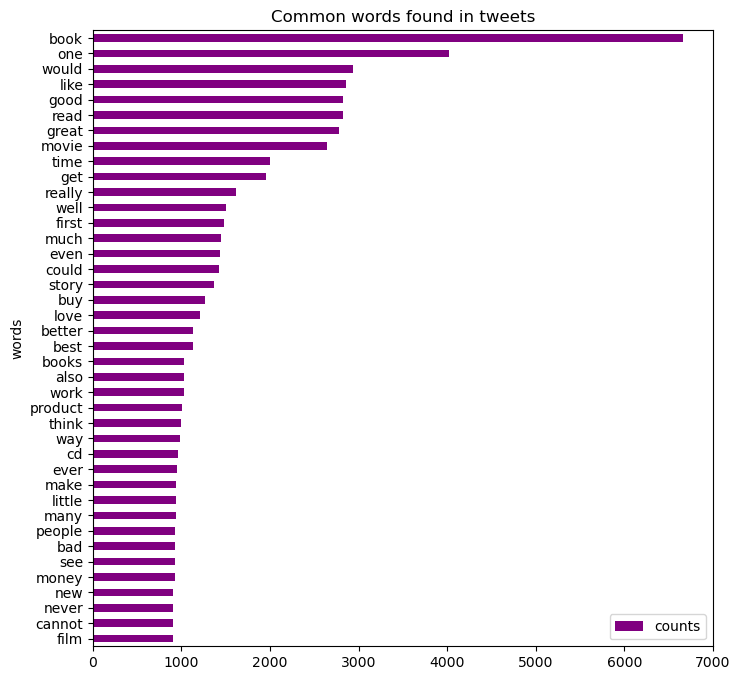

In [171]:
fig,ax = plt.subplots(figsize=(8,8))

clean_tweets.sort_values(by='counts').plot.barh(x='words',y='counts',
                                              ax=ax,
                                              color='purple')
ax.set_title('Common words found in tweets')
plt.show()

In [172]:
from nltk.corpus import stopwords
stop =stopwords.words('english')
data_clean['review']=data_clean['review'].apply(lambda x:' '.join([word for word in x.split() if word not in (stop)]))
data_clean.head()

,label,review
0,pos,stuning even non gamer sound track beautiful p...
1,pos,best soundtrack ever anything reading lot revi...
2,pos,amazing soundtrack favorite music time hands i...
3,pos,excellent soundtrack truly like soundtrack enj...
4,pos,remember pull jaw floor hearing played game kn...


In [173]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\CHHAYA
[nltk_data]     SINGH\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [174]:
from nltk.tokenize import sent_tokenize,word_tokenize
data_clean['review'] = data_clean['review'].apply(lambda x:word_tokenize(x))
data_clean.head()


,label,review
0,pos,"[stuning, even, non, gamer, sound, track, beau..."
1,pos,"[best, soundtrack, ever, anything, reading, lo..."
2,pos,"[amazing, soundtrack, favorite, music, time, h..."
3,pos,"[excellent, soundtrack, truly, like, soundtrac..."
4,pos,"[remember, pull, jaw, floor, hearing, played, ..."


In [175]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to C:\Users\CHHAYA
[nltk_data]     SINGH\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [176]:
from nltk.stem import WordNetLemmatizer
def word_lemmatizer(text):
    lem_text=[WordNetLemmatizer().lemmatize(i) for i in text]
    return lem_text
data_clean['review']=data_clean['review'].apply(lambda x: word_lemmatizer(x))
data_clean.head()

,label,review
0,pos,"[stuning, even, non, gamer, sound, track, beau..."
1,pos,"[best, soundtrack, ever, anything, reading, lo..."
2,pos,"[amazing, soundtrack, favorite, music, time, h..."
3,pos,"[excellent, soundtrack, truly, like, soundtrac..."
4,pos,"[remember, pull, jaw, floor, hearing, played, ..."


In [177]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to C:\Users\CHHAYA
[nltk_data]     SINGH\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [178]:
#from nltk.stem import PorterStemmer
#def word_stemmer(text):
    #stem_text=[PorterStemmer().stem(i) for i in text]
    #return stem_text
#data_clean['review']=data_clean['review'].apply(lambda x:word_stemmer(x))
#data_clean.head()

In [179]:
vocab_size=10000
embedding_dim=300
max_length=20

In [180]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()

data_clean['label']=le.fit_transform(data_clean['label'])
data_clean['label'].value_counts()


0    5097
1    4903
Name: label, dtype: int64

In [181]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data_clean['review'],data_clean['label'],test_size=0.2,random_state=42)

In [182]:
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer=Tokenizer(vocab_size)
tokenizer.fit_on_texts(x_train)
word_index=tokenizer.word_index
print(word_index)

{'book': 1, 'one': 2, 'movie': 3, 'like': 4, 'would': 5, 'read': 6, 'good': 7, 'great': 8, 'time': 9, 'get': 10, 'story': 11, 'really': 12, 'first': 13, 'well': 14, 'work': 15, 'make': 16, 'love': 17, 'much': 18, 'even': 19, 'could': 20, 'buy': 21, 'year': 22, 'better': 23, 'best': 24, 'film': 25, 'product': 26, 'way': 27, 'think': 28, 'character': 29, 'thing': 30, 'also': 31, 'cd': 32, 'little': 33, 'know': 34, 'see': 35, 'want': 36, 'ever': 37, 'people': 38, 'money': 39, 'many': 40, 'bad': 41, 'say': 42, 'can': 43, 'not': 44, 'never': 45, 'album': 46, 'go': 47, 'life': 48, 'got': 49, 'new': 50, 'back': 51, 'music': 52, 'reading': 53, 'game': 54, 'song': 55, 'bought': 56, 'use': 57, 'dvd': 58, 'find': 59, 'made': 60, 'still': 61, 'two': 62, 'recommend': 63, 'review': 64, 'give': 65, 'thought': 66, 'found': 67, 'old': 68, 'look': 69, 'day': 70, 'star': 71, 'lot': 72, 'take': 73, 'version': 74, 'quality': 75, 'put': 76, 'every': 77, 'another': 78, 'need': 79, 'sound': 80, 'come': 81, 'w

In [183]:
sequences_1=tokenizer.texts_to_sequences(x_train)

In [184]:
print(sequences_1)

[[9352, 2671, 122, 2, 468, 338, 872, 1, 174, 707, 67, 252, 678, 1810, 298, 2, 3923, 829, 499, 50, 1021, 62, 3923, 350, 59, 168, 121, 59, 716, 422, 4, 1, 33, 66, 18, 1618, 2440, 2352, 2353, 2781, 1234, 2440, 9, 81, 217, 40, 1021, 538, 4634, 698, 4634, 9353, 59, 31, 1705, 57, 9354, 559, 50, 1021, 2, 479, 122, 1, 4635, 321, 40, 1021, 538, 9355, 26, 4251, 303, 1493, 1493, 1, 84, 203, 228, 4252, 953], [309, 103, 474, 141, 24, 26, 5, 34, 158, 1664, 2118, 159, 311, 2056, 593, 3924, 152, 265, 85, 9356, 322, 657, 446, 1706, 51, 47, 69, 85, 341, 112, 179, 57], [301, 5670, 2, 142, 127, 2198, 22, 22, 116, 22, 61, 67, 116, 5, 1263, 281, 83, 9, 1811, 389, 707, 235, 132, 13, 9, 292, 954, 1580, 4636, 14], [616, 2279, 1414, 1619, 25, 539, 1040, 16, 2279, 3, 8, 99, 109, 1812, 52, 489, 57, 362, 3673, 29, 997, 106, 11, 213, 9357, 106, 763, 903, 180, 2441, 301, 450, 1494, 2279, 25, 293, 16, 209, 955], [807, 939, 2057, 37, 6, 9, 96, 256, 131, 939, 2057, 1349, 794, 3925, 2442, 2923, 717, 939, 666, 904, 1022,

In [185]:
word_index=tokenizer.word_index
print('Found %s unique tokens'% len(word_index))


Found 24241 unique tokens


In [186]:
#Max_sequence_length=30
from tensorflow.keras.preprocessing.sequence import pad_sequences
data_1 = pad_sequences(sequences_1,maxlen=max_length)
labels = np.array(y_train)
print('Shape of data tensor:', data_1.shape)
print('Shape of label tensor:', labels.shape)

Shape of data tensor: (8000, 20)
Shape of label tensor: (8000,)


In [187]:
#MAX_NB_WORDS = 200000
#EMBEDDING_DIM = 300 

In [188]:
!pip install wget

Defaulting to user installation because normal site-packages is not writeable


In [189]:
!pip install unzip

Defaulting to user installation because normal site-packages is not writeable


In [190]:
#!unzip /content/glove.6B.zip

'unzip' is not recognized as an internal or external command,
operable program or batch file.


In [199]:
#import wget
#url = 'http://nlp.stanford.edu/data/glove.6B.zip'
#myfile = wget.download(url)

In [204]:
import os
print('Indexing word vectors')

embeddings_index={}
with open(os.path.join('C:/Users/CHHAYA SINGH/glove/', 'glove.6B.300d.txt'),encoding="utf8") as f:
    for line in f:
        word,coefs = line.split(maxsplit=1)
        coefs = np.fromstring(coefs, 'f', sep=' ')
        embeddings_index[word] = coefs
print('Found %s word vectors,' % len(embeddings_index))        

Indexing word vectors
Found 400000 word vectors,


In [205]:
embedding_matrix = np.zeros((len(word_index) + 1, embedding_dim))
for word, i  in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        #words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector

In [230]:
from keras.models import Sequential
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, Bidirectional, Dropout, BatchNormalization, GlobalMaxPool1D
length_long_sentence= 20
model= Sequential()
model.add(Embedding(input_dim=embedding_matrix.shape[0],
                   output_dim=embedding_matrix.shape[1],
                   weights=[embedding_matrix],
                   input_length=length_long_sentence))
model.add(Bidirectional(LSTM(length_long_sentence, return_sequences=True,recurrent_dropout=0.2)))
model.add(GlobalMaxPool1D())
model.add(BatchNormalization())
model.add(Dropout(0.7))
model.add(Dense(length_long_sentence,activation='relu'))
model.add(Dropout(0.7))
model.add(Dense(length_long_sentence,activation='relu'))
model.add(Dropout(0.7))
model.add(Dense(2,activation='softmax'))
model.compile(optimizer='rmsprop',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, 20, 300)           7272600   
                                                                 
 bidirectional_9 (Bidirectio  (None, 20, 40)           51360     
 nal)                                                            
                                                                 
 global_max_pooling1d_8 (Glo  (None, 40)               0         
 balMaxPooling1D)                                                
                                                                 
 batch_normalization_8 (Batc  (None, 40)               160       
 hNormalization)                                                 
                                                                 
 dropout_24 (Dropout)        (None, 40)                0         
                                                      

In [231]:
hist = model.fit(data_1,y_train,
                epochs=20,
                batch_size=64,
                validation_split=0.1,
                shuffle=True)


Epoch 1/20
113/113 [==============================] - 10s 52ms/step - loss: 1.4527 - accuracy: 0.5190 - val_loss: 0.6857 - val_accuracy: 0.5525
Epoch 2/20
113/113 [==============================] - 6s 53ms/step - loss: 0.9012 - accuracy: 0.5138 - val_loss: 0.6864 - val_accuracy: 0.5512
Epoch 3/20
113/113 [==============================] - 6s 51ms/step - loss: 0.7336 - accuracy: 0.5324 - val_loss: 0.6840 - val_accuracy: 0.5600
Epoch 4/20
113/113 [==============================] - 6s 50ms/step - loss: 0.6891 - accuracy: 0.5565 - val_loss: 0.6733 - val_accuracy: 0.6112
Epoch 5/20
113/113 [==============================] - 6s 52ms/step - loss: 0.6689 - accuracy: 0.5778 - val_loss: 0.6349 - val_accuracy: 0.7063
Epoch 6/20
113/113 [==============================] - 5s 48ms/step - loss: 0.6527 - accuracy: 0.6156 - val_loss: 0.5904 - val_accuracy: 0.7450
Epoch 7/20
113/113 [==============================] - 6s 50ms/step - loss: 0.6221 - accuracy: 0.6651 - val_loss: 0.5502 - val_accuracy: 0.762

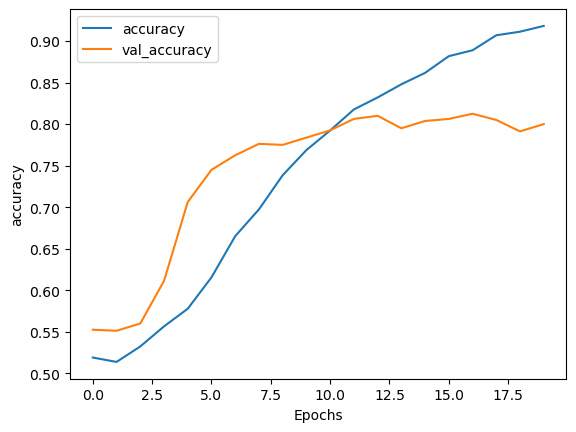

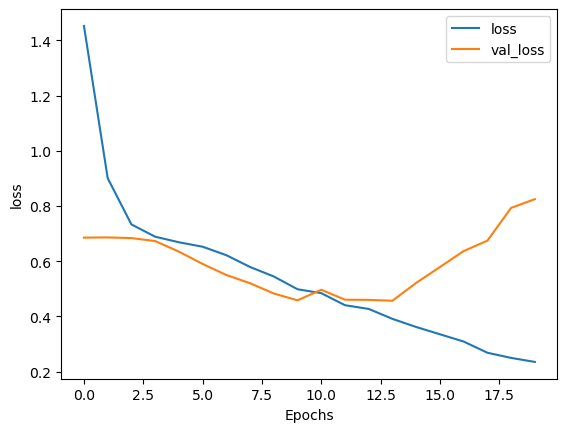

In [232]:
import matplotlib.pyplot as plt
def plot_graphs(history,string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel('Epochs')
    plt.ylabel(string)
    plt.legend([string,'val_'+string])
    plt.show()
    
plot_graphs(hist,'accuracy')
plot_graphs(hist,'loss')

In [233]:
test_sequences= tokenizer.texts_to_sequences(x_test)
test_data= pad_sequences(test_sequences,maxlen=max_length)
loss,accuracy=model.evaluate(test_data,y_test)
print('Loss:',loss)
print('Accuracy:',accuracy)


63/63 [==============================] - 0s 4ms/step - loss: 0.7783 - accuracy: 0.7860
Loss: 0.778298020362854
Accuracy: 0.7860000133514404


In [234]:
from sklearn.metrics import(precision_score,recall_score,f1_score,
                           classification_report,
                           accuracy_score)
def metrics(pred_tag,y_test):
    print('f1 score:', f1_score(pred_tag,y_test))
    print('Precision:',precision_score(pred_tag,y_test))
    print('Recall:',recall_score(pred_tag,y_test))
    print('Accuracy:',recall_score(pred_tag,y_test))
    print('-'*50)
    print(classification_report(pred_tag,y_test))
preds=np.argmax(model.predict(test_data), axis=-1)
metrics(preds,y_test)
    
    
    
    

63/63 [==============================] - 1s 6ms/step
f1 score: 0.7611607142857143
Precision: 0.7082035306334372
Recall: 0.8226779252110977
Accuracy: 0.8226779252110977
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.86      0.76      0.81      1171
           1       0.71      0.82      0.76       829

    accuracy                           0.79      2000
   macro avg       0.78      0.79      0.78      2000
weighted avg       0.80      0.79      0.79      2000

